## 대표적인 연속형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate # (통계 및 적분 계산)
from scipy.optimize import minimize_scalar # (함수에서 구현 가능한 최소값 파악)

%precision 3
%matplotlib inline

#### 통계 계산 함수 활용
- E(X) : 확률변수의 기대값
- V(X): 확률변수의 분산
- check_prob : 확률변수의 성질을 만족하는지 검증 후 기대값, 분산을 반환하는 함수
- plot_prob : 확률변수의 확률밀도함수 및 기대값을 시각화하기 위한 함수

In [2]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x): # 누적분포함수
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], # 확률밀도함수
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], # 누적분포함수
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

### 정규분포

In [3]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [4]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [5]:
check_prob(X)

expected vaue 2.000
variance 0.250


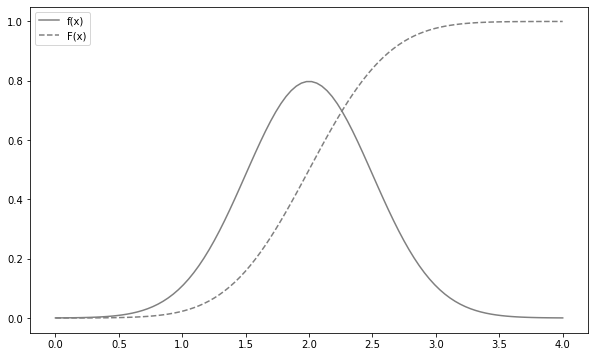

In [6]:
plot_prob(X, 0, 4)

In [8]:
# stats.norm으로 정규분포의 기대값, 분산 계산
rv = stats.norm(2, 0.5)

In [9]:
rv.mean(), rv.var()

(2.000, 0.250)

In [10]:
# 확률밀도함수(PDF)
rv.pdf(2)

0.798

In [11]:
# 누적확률분포(CDF)
rv.cdf(1.7)

0.274

In [12]:
# 상위 알파 확률의 기준이 되는 x 계산
# P(X >= x) = 알파 / 확률이 아닌 확률로 x를 구한다
rv.isf(0.3)

2.262

In [15]:
# interval : N(평균, 분산)의 확률이 알파가 되는 가운데 범위
# P(x0  <=  X <= x1 ) = 알파의 기준이 되는 x0, x1 계산
rv.interval(0.9)

(1.178, 2.822)

In [16]:
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

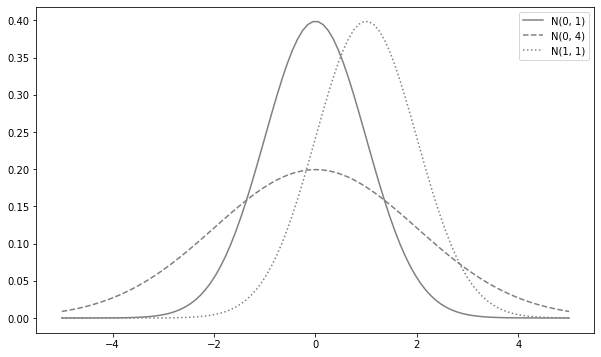

In [18]:
# N(0,1)[표준정규분포], N(0,4), N(1,1) 의 시각화

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs), # 확률밀도함수(PDF)
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

### 지수분포

In [19]:
# 지수분포 : 어떤 사건이 발생하는데 소요되는 시간에 따른 확률분포 / 행위가 1회 발생할 확률
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [20]:
lam = 3
X = Ex(lam)

In [21]:
check_prob(X)

expected vaue 0.333
variance 0.111


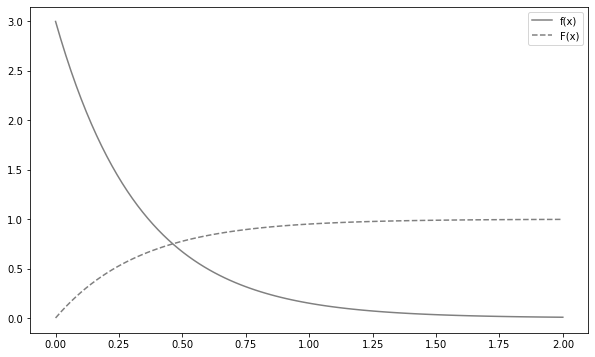

In [22]:
plot_prob(X, 0, 2)

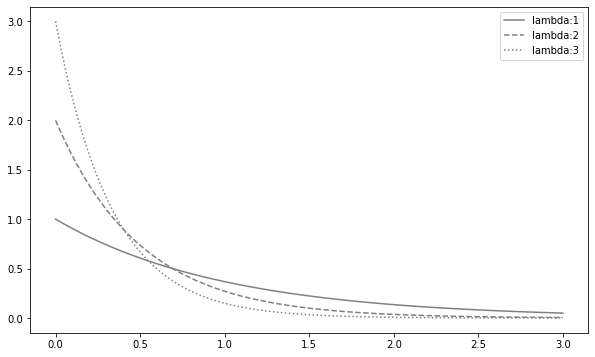

In [24]:
# scipy.stats의 expon 모듈 기반 지수 분포 Ex(1), Ex(2), Ex(3) 시각화

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs), # 확률밀도함수(PDF)
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

### 카이제곱 / t / F 분포
- 추정과 검정에 사용될 특수한 확률분포
- 어떤 사건을 따르는 것이 아닌 어떤 형태를 따르는지에 따라 표현되는 확률분포
- 정규분포와 어떤 관련성을 맺고 있는지에 대해서 중점을 두고 표현될 예정

### 카이제곱 분포
- 분산의 구간추정이나 독립성 검정에서 사용되는 확률분포
- 서로 독립인 복수의 표준정규분포에 의해 정의된다
- Z1,Z2, ... Zn이 서로 독립이고 N(0,1)을 따르고 있을 때, 그 제곱합의 확률분포를 자유도가 n인 카이제곱분포라 표현한다

In [26]:
n = 10
rv = stats.norm() # 표준정규분포
sample_size = int(1e6)
# 표준정규분포로부터 10×100만 사이즈로 무작위추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0)

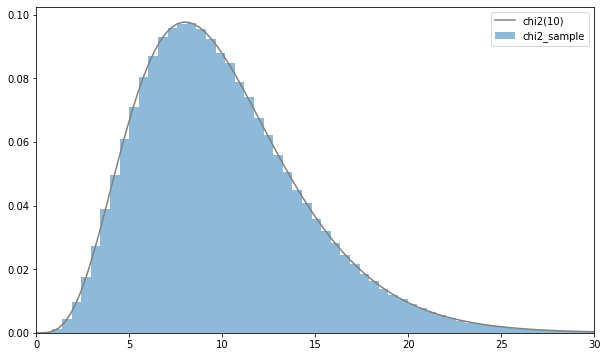

In [27]:
# scipy.stats의 chi2 모듈로서 자유도가 10인 X^2(10) 구현

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 무작위 추출로 100만번 수행 VS scipy.stats의 chi2 모듈로 구현
rv_true = stats.chi2(n) # chi2 : 카이제곱분포 모듈
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray') # 확률밀도함수

ax.legend()
ax.set_xlim(0, 30)
plt.show()

# 비슷하게 분포가 표현되는 것을 확인할 수 있음

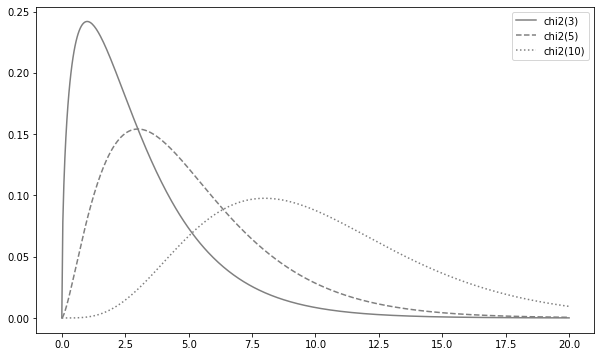

In [28]:
# 카이제곱 분포 X^2(3), X^2(5), X^2(10) 시각화

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

카이제곱 분포 특징
- 좌우비대칭으로서, 왼쪽으로 치우치고 오른쪽으로 넓어짐
- 자유도가 커지면 좌우대칭에 가까워짐
- 자유도의 값(3, 5, 10) 가까이에 분포의 정점 존재

In [29]:
# 상위 0.05( P(X >= x) = 0.05 )의 기준이 되는 x 계산
rv = stats.chi2(5)
rv.isf(0.05)

11.070

### t 분포 (t Distribution)

- Z, Y는 서로 독립이고, Z\~N(0,1)\[표준정규분포\]을, Y\~X^2(n)\[카이제곱분포\]를 따를 때의 확률분포를 자유도가 n인 t 분포라 표현
- 표기법 : t(n)

In [34]:
# Z, Y는 서로 독립이고, Z~N(0,1)[표준정규분포]을, Y~X^2(10)[카이제곱분포]를 따를 때

n = 10
rv1 = stats.norm() # 표준정규분포
rv2 = stats.chi2(n) # 자유도가 10인 카이제곱분포

# 무직위추출 100만번 수행
sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

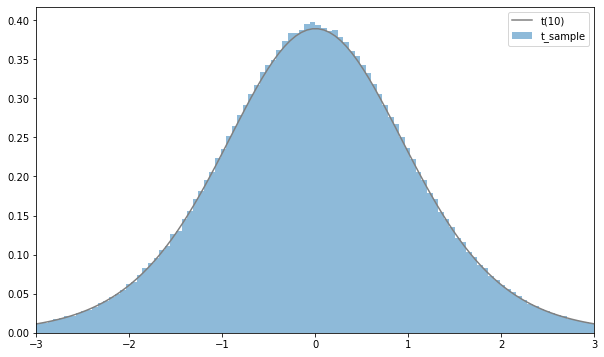

In [31]:
# 무작위 추출로 100만번 수행 VS scipy.stats의 t 모듈로 구현

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n) # stats.t() : t 분포
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

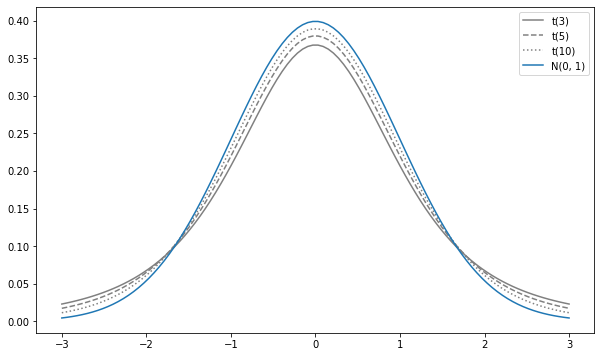

In [35]:
# t 분포 t(3), t(5), t(10) 시각화

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm() # 표준정규분포
ax.plot(xs, rv.pdf(xs), label='N(0, 1)') 
    
ax.legend()
plt.show()

t 분포 특징
- 좌우비대칭인 분포
- 표준정규분포보다 양쪽 끝이 두꺼움
- 자유도가 커지면 표준정규분포에 가까워짐

In [33]:
rv = stats.t(5)
rv.isf(0.05)

2.015

### F 분포 (F Distribution)

- 분산분석 등에서 사용되는 확률분포
- Y1, Y2는 서로 독립이고 Y1\~X^2(n1)\[카이제곱분포\], Y2\~X^2(n2)\[카이제곱분포\]을 따를 때의 확률분포를 자유도가 n1, n2인 F 분포라 표현한다
- 표기법 : F(n1,n2)


In [38]:
# Y1, Y2는 서로 독립이고 Y1~X^2(5), Y2~X^2(10)을 따를 때
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

# 무직위추출 100만번 수행
sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

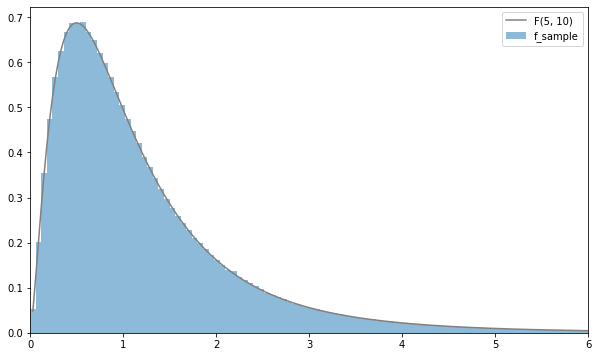

In [39]:
# 무작위 추출로 100만번 수행 VS scipy.stats의 f 모듈로 구현

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2) # stats.f() : f 분포
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray') # 확률밀도함수

ax.legend()
ax.set_xlim(0, 6)
plt.show()

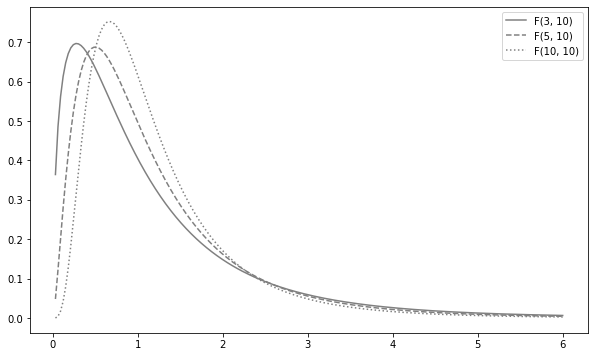

In [41]:
# f 분포 f(3, 10), f(5, 10), f(10, 10) 시각화

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()

f 분포 특징
- 좌우비대칭인 분포
- 왼쪽으로 치우치고. 오른쪽으로 넓어지는 분포
- 분포의 정점은 1에 가까움